<a href="https://colab.research.google.com/github/jx-dohwan/Aiffel_EGLMS_Project/blob/main/%5BEXP_15%5DCompare_different_OCR_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [EXP_15]Compare_different_OCR_models

우리는 지금까지 Google OCR API, keras-ocr, Tesseract 이상 3가지의 OCR 기능을 간단히 활용하여 보았습니다.

3가지를 검증해 보는 프로젝트를 진행하겠습니다. 여러분은 OCR 기능을 활용한 서비스를 빠르게 개발해야 하는 임무를 맡은 엔지니어가 되어, 어떤 모듈을 도입하면 좋을지 기술검증을 하는 역할을 맡게 되었다고 가정합니다.

## 1. 필요한 라이브러리 다운로드 및 import

In [1]:
!pip install google-api-python-client google-cloud-vision
!pip install keras_ocr matplotlib==3.3.0
!apt install tesseract-ocr
!apt install libtesseract-dev
!pip install pytesseract
!pip install Pillow==9.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.

In [2]:
! pip install Pillow==9.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! pip install --upgrade google-api-python-client
! pip install google-cloud-vision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import keras_ocr
import pytesseract
import cv2 
import matplotlib.pyplot as plt
import numpy as np 
import os
import glob
from google.colab.patches import cv2_imshow
import keras_ocr

print(keras_ocr.__version__)
print(pytesseract.__version__)

0.9.1
0.3.10


## 2. 검증용 데이터셋 준비
 텍스트의 모양과 크기, 배치, 노이즈 등 OCR의 성능에 영향을 미치는 요인들에 관한 것이었습니다. 여러분들은 위 3가지 기능들이 이미지에 나타난 특징에 따라 얼마나 정확하게 문자를 detect하고 recognize하는지를 검증하기 위한 이미지 데이터를 모아야 한다.


In [5]:
image_path = '/content/drive/MyDrive/인공지능/아이펠/ES/data/ocr_python/test_image'
images_list = os.listdir(image_path)
images_list

['ocr_image5.jpg',
 'ocr_image.jpg',
 'ocr_image2.jpg',
 'ocr_image3.jpg',
 'ocr_image4.jpg']

## 3~4. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항) & 테스트 결과 정리

위 세 가지 모듈을 활용하는 방법에 대해서는 코드 레벨로 이미 경험해 보셨을 것입니다. 이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아 봅시다. 가능하다면 Google OCR API를 포함해 세 가지 모듈을 다 써보세요.


모듈들마다 출력 형태가 다릅니다. 분석을 위해 결과를 일목요연하게 정리해 보는 것이 도움이 될 것입니다. 시각화 방법이 함께 활용된다면 더욱 좋겠군요.

### 1) Google OCR API

In [6]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [7]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  '/content/drive/MyDrive/인공지능/아이펠/ES/data/ocr_python/my_google_api_key.json'
count = 1
for image_list in images_list:
  print('\n--------------------------{}-------------------------'.format(count), sep='\n')
  detect_text(os.path.join(image_path, image_list))
  count += 1
  

total 8
drwx------ 5 root root 4096 Sep 15 01:10 drive
drwxr-xr-x 1 root root 4096 Sep  9 13:22 sample_data

--------------------------1-------------------------
Texts:

"START NOW
ERFECT
LATER"

"START"

"NOW"

"ERFECT"

"LATER"
bounds: (305,668),(596,668),(596,707),(305,707)

--------------------------2-------------------------
Texts:

"PROPAGANDA"

"PROPAGANDA"
bounds: (203,492),(661,500),(660,569),(202,561)

--------------------------3-------------------------
Texts:

"Stephen R. Covey
THE 7 HABITS OF HIGHLY
EFFECTIVE PEOPLE"

"Stephen"

"R."

"Covey"

"THE"

"7"

"HABITS"

"OF"

"HIGHLY"

"EFFECTIVE"

"PEOPLE"
bounds: (485,1186),(715,1188),(714,1262),(484,1260)

--------------------------4-------------------------
Texts:

"MONEY IS GAME. MASTER THE GAME!
MONEY"

"MONEY"

"IS"

"GAME"

"."

"MASTER"

"THE"

"GAME"

"!"

"MONEY"
bounds: (118,506),(704,500),(705,606),(119,612)

--------------------------5-------------------------
Texts:

"A STUDY OF HISTORY
Soy السنة"

"A"

"STUDY"



> 텍스트를 단어 및 구두점 단위로 분리하여 출력하고 있다.

### 2) keras-ocr

In [8]:
pipeline = keras_ocr.pipeline.Pipeline()

images = [ keras_ocr.tools.read(os.path.join(image_path, image_list)) for image_list in images_list]
prediction_groups = [pipeline.recognize([os.path.join(image_path, image_list)]) for image_list in images_list]

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


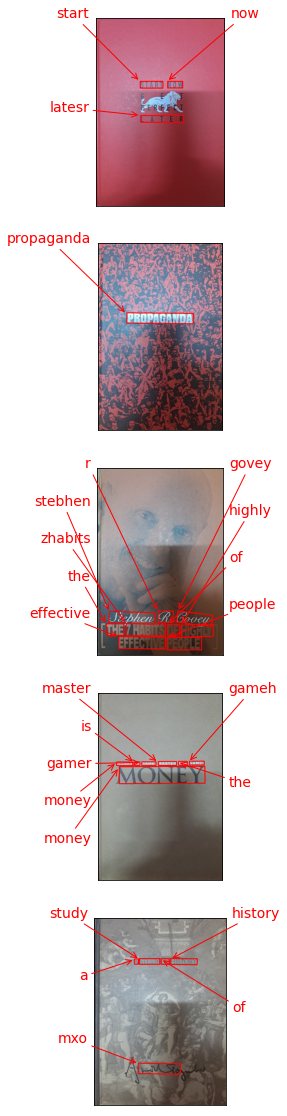

In [9]:
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

> 이미지 인식할 수 있는 단어 단위로 영역을 구분하여 결과를 출력하고 있다.

### 3) Tesseract

In [10]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [11]:
image_path2 = '/content/drive/MyDrive/인공지능/아이펠/ES/data/ocr_python/sample_image'

count = 1
for image_list in images_list:
  img_file_path = os.path.join(image_path, image_list)  #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 
  globals()['cropped_image_path_list_{}'.format(count)] = crop_word_regions(img_file_path, image_path2)
  count += 1
  image_path2 = '/content/drive/MyDrive/인공지능/아이펠/ES/data/ocr_python/sample_image{}'.format(count)


/content/drive/MyDrive/인공지능/아이펠/ES/data/ocr_python/sample_image/0000.png
/content/drive/MyDrive/인공지능/아이펠/ES/data/ocr_python/sample_image/0001.png
/content/drive/MyDrive/인공지능/아이펠/ES/data/ocr_python/sample_image2/0000.png
/content/drive/MyDrive/인공지능/아이펠/ES/data/ocr_python/sample_image2/0001.png
/content/drive/MyDrive/인공지능/아이펠/ES/data/ocr_python/sample_image2/0002.png
/content/drive/MyDrive/인공지능/아이펠/ES/data/ocr_python/sample_image2/0003.png
/content/drive/MyDrive/인공지능/아이펠/ES/data/ocr_python/sample_image2/0004.png
/content/drive/MyDrive/인공지능/아이펠/ES/data/ocr_python/sample_image2/0005.png
/content/drive/MyDrive/인공지능/아이펠/ES/data/ocr_python/sample_image2/0006.png
/content/drive/MyDrive/인공지능/아이펠/ES/data/ocr_python/sample_image2/0007.png
/content/drive/MyDrive/인공지능/아이펠/ES/data/ocr_python/sample_image2/0008.png
/content/drive/MyDrive/인공지능/아이펠/ES/data/ocr_python/sampl

In [12]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")


In [13]:
recognize_images(cropped_image_path_list_1)

amare ce ne ESSE TS Ee a

, h

Done


In [14]:
recognize_images(cropped_image_path_list_2)

“



|


7


F

|


*

baie

: :


a,

r

\

Done


In [15]:
recognize_images(cropped_image_path_list_3)


Done


In [16]:
recognize_images(cropped_image_path_list_4)


Done


In [17]:
recognize_images(cropped_image_path_list_5)

‘

Done


> 이미지를 여러개로 잘라서 필요한 부분의 글자를 읽는 방식으로 글자를 출력하고 잇다.

## 5. 결과 분석과 결론 제시
우선 여러분들이 구현하고자 하는 서비스의 목적과 내용을 먼저 정리합니다. 여러분들이 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가 기준을 제시합니다. 그 기준에 따라 위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정합니다.

## 6. 회고